In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels as sm

In [2]:
# Load the data
trades_df = pd.read_csv('data/trades_round_1_day_-2_nn.csv', delimiter=';')
prices_df = pd.read_csv('data/prices_round_1_day_-2.csv', delimiter=';')

In [3]:
trades_df = trades_df[trades_df["symbol"] == "STARFRUIT"]
trades_df.set_index("timestamp", inplace=True)
trades_df

,buyer,seller,symbol,currency,price,quantity
timestamp,,,,,,
0,NaN,NaN,STARFRUIT,SEASHELLS,5003.0,1
100,NaN,NaN,STARFRUIT,SEASHELLS,5004.0,6
900,NaN,NaN,STARFRUIT,SEASHELLS,5001.0,2
1000,NaN,NaN,STARFRUIT,SEASHELLS,4997.0,2
1100,NaN,NaN,STARFRUIT,SEASHELLS,4997.0,1
...,...,...,...,...,...,...
998000,NaN,NaN,STARFRUIT,SEASHELLS,5043.0,1
998000,NaN,NaN,STARFRUIT,SEASHELLS,5046.0,4
998900,NaN,NaN,STARFRUIT,SEASHELLS,5046.0,1


In [4]:
prices_df.fillna(0, inplace=True)

In [5]:
prices_df = prices_df[prices_df["product"] == "STARFRUIT"]
prices_df.set_index("timestamp", inplace=True)
prices_df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-2,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,26,0.0,0.0,0.0,0.0,5000.0,0.0
100,-2,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,0.0,0.0,0.0,0.0,5002.0,0.0
200,-2,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,5000.0,0.0
300,-2,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,27,0.0,0.0,0.0,0.0,4999.5,0.0
400,-2,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,20,0.0,0.0,0.0,0.0,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,-2,STARFRUIT,5041,2,5040.0,24.0,0.0,0.0,5047,26,0.0,0.0,0.0,0.0,5044.0,0.0
999600,-2,STARFRUIT,5040,30,0.0,0.0,0.0,0.0,5047,30,0.0,0.0,0.0,0.0,5043.5,0.0
999700,-2,STARFRUIT,5040,22,0.0,0.0,0.0,0.0,5047,22,0.0,0.0,0.0,0.0,5043.5,0.0


In [6]:
prices_df['vwap'] = (
    prices_df['bid_price_1'] * prices_df['bid_volume_1'] +
    prices_df['bid_price_2'] * prices_df['bid_volume_2'] +
    prices_df['bid_price_3'] * prices_df['bid_volume_3'] + 
    prices_df['ask_price_1'] * prices_df['ask_volume_1'] +
    prices_df['ask_price_2'] * prices_df['ask_volume_2'] +
    prices_df['ask_price_3'] * prices_df['ask_volume_3'] ) / (prices_df['bid_volume_1'] + prices_df['bid_volume_2'] + prices_df['bid_volume_3'] + prices_df['ask_volume_1'] + prices_df['ask_volume_2'] + prices_df['ask_volume_3'])

In [7]:
prices_df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap
timestamp,,,,,,,,,,,,,,,,,
0,-2,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,26,0.0,0.0,0.0,0.0,5000.0,0.0,5000.000000
100,-2,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,0.0,0.0,0.0,0.0,5002.0,0.0,5000.156863
200,-2,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,5000.0,0.0,4999.516129
300,-2,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,27,0.0,0.0,0.0,0.0,4999.5,0.0,4999.500000
400,-2,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,20,0.0,0.0,0.0,0.0,4998.5,0.0,4998.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,-2,STARFRUIT,5041,2,5040.0,24.0,0.0,0.0,5047,26,0.0,0.0,0.0,0.0,5044.0,0.0,5043.538462
999600,-2,STARFRUIT,5040,30,0.0,0.0,0.0,0.0,5047,30,0.0,0.0,0.0,0.0,5043.5,0.0,5043.500000
999700,-2,STARFRUIT,5040,22,0.0,0.0,0.0,0.0,5047,22,0.0,0.0,0.0,0.0,5043.5,0.0,5043.500000


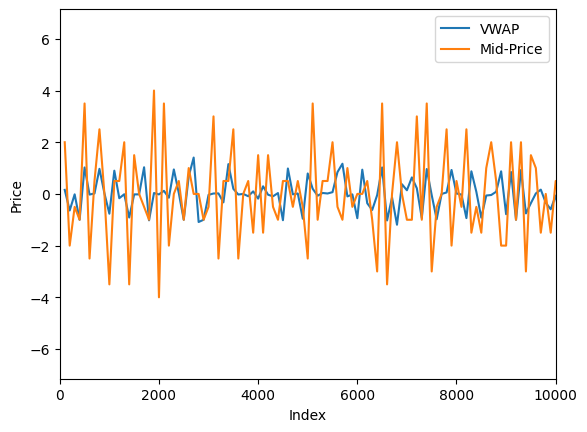

In [8]:
fig, ax = plt.subplots()

ax.plot(prices_df["vwap"].diff(), label='VWAP')
ax.plot(prices_df["mid_price"].diff(), label='Mid-Price')

ax.set_xlabel('Index')
ax.set_ylabel('Price')
ax.legend()
plt.xlim(0,10002)

plt.show()

In [9]:
import statsmodels.tsa.stattools as tsa

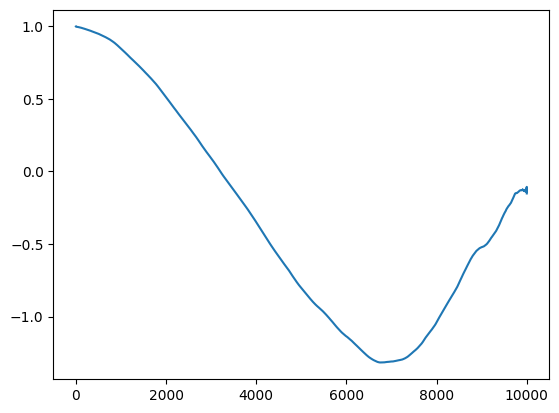

In [10]:
plt.plot(tsa.ccf(prices_df["bid_price_1"],prices_df["mid_price"]))

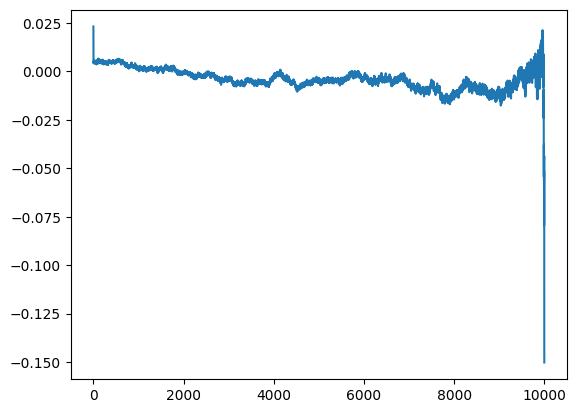

In [11]:
plt.plot(tsa.ccf(prices_df["bid_price_2"],prices_df["mid_price"]))

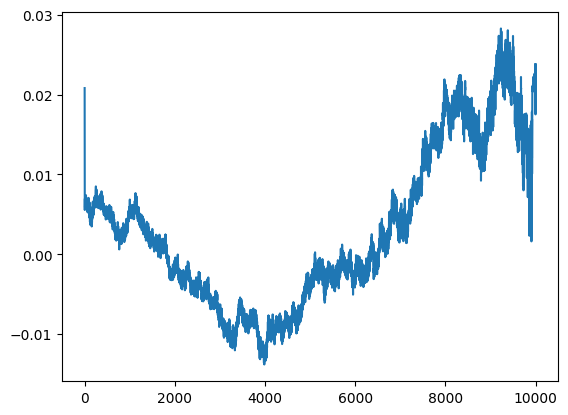

In [12]:
plt.plot(tsa.ccf(prices_df["bid_price_3"],prices_df["mid_price"]))

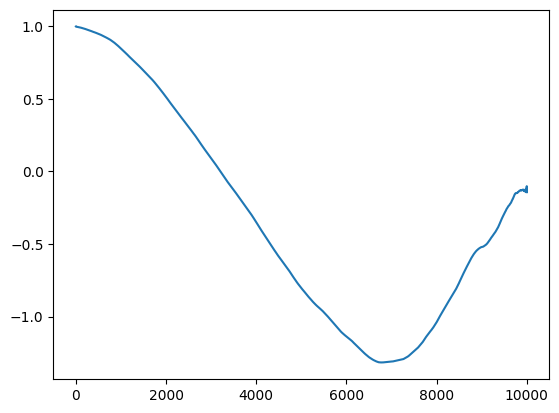

In [13]:
plt.plot(tsa.ccf(prices_df["ask_price_1"],prices_df["mid_price"]))

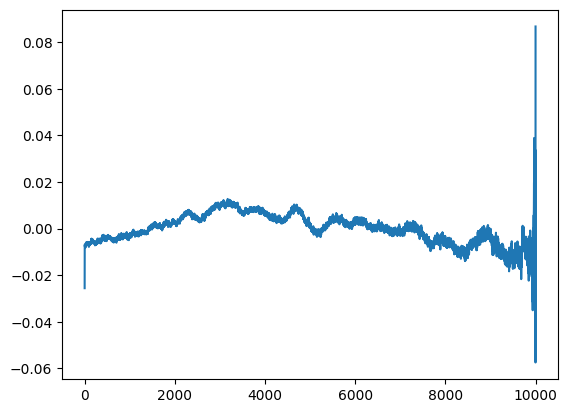

In [14]:
plt.plot(tsa.ccf(prices_df["ask_price_2"],prices_df["mid_price"]))

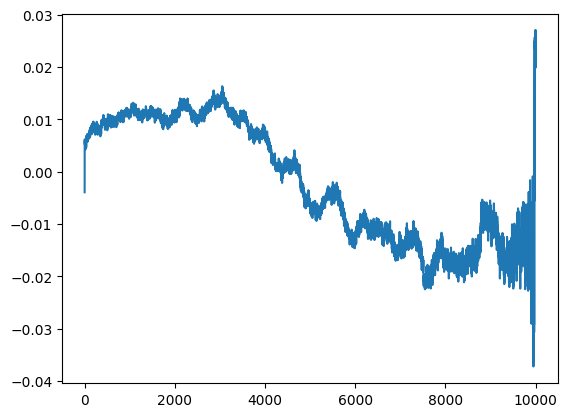

In [15]:
plt.plot(tsa.ccf(prices_df["ask_price_3"],prices_df["mid_price"]))